In [1]:
from nba_api.stats.static import players

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == 'BOS'][0]
celtics_id = celtics['id']

knicks = [team for team in nba_teams if team['abbreviation'] == 'NYK'][0]
knicks_id = knicks['id']

knicks

{'id': 1610612752,
 'full_name': 'New York Knicks',
 'abbreviation': 'NYK',
 'nickname': 'Knicks',
 'city': 'New York',
 'state': 'New York',
 'year_founded': 1946}

In [2]:
from nba_api.stats.endpoints import leaguegamefinder
import matplotlib.pyplot as plt

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id, vs_team_id_nullable = knicks_id)
# The first DataFrame of those returned is what we want.
#games = gamefinder.get_data_frames()[0]
#games.head()

In [5]:
games.groupby(games.SEASON_ID.str[-4:])[['GAME_ID']].count().loc['2015':]

,GAME_ID
SEASON_ID,
2015,6
2016,6
2017,4
2018,5
2019,1


In [8]:
lastknicksgame = games.sort_values('GAME_DATE').iloc[-10:]
lastknicksgame.head(n=10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
9,22017,1610612738,BOS,Boston Celtics,0021700051,2017-10-24,BOS vs. NYK,W,241,110,...,0.815,5,36,41,26,11,7,12,24,21.0
8,22017,1610612738,BOS,Boston Celtics,0021700468,2017-12-21,BOS @ NYK,L,239,93,...,0.737,9,26,35,17,11,1,10,20,-8.8
7,22017,1610612738,BOS,Boston Celtics,0021700758,2018-01-31,BOS vs. NYK,W,240,103,...,0.600,5,44,49,27,8,3,9,22,30.0
6,22017,1610612738,BOS,Boston Celtics,0021700886,2018-02-24,BOS @ NYK,W,240,121,...,0.857,11,34,45,21,11,5,11,15,9.0
5,22018,1610612738,BOS,Boston Celtics,1521800055,2018-07-12,BOS vs. NYK,W,201,82,...,0.750,14,27,41,17,7,6,7,19,12.0
4,22018,1610612738,BOS,Boston Celtics,0021800028,2018-10-20,BOS @ NYK,W,240,103,...,0.848,11,36,47,21,8,2,15,26,2.0
3,22018,1610612738,BOS,Boston Celtics,0021800255,2018-11-21,BOS vs. NYK,L,241,109,...,0.719,15,35,50,30,10,9,8,16,-8.0
2,22018,1610612738,BOS,Boston Celtics,0021800365,2018-12-06,BOS vs. NYK,W,240,128,...,0.850,7,39,46,32,8,6,9,24,28.0
1,22018,1610612738,BOS,Boston Celtics,0021800771,2019-02-01,BOS @ NYK,W,241,113,...,0.800,11,32,43,25,11,7,7,18,14.0
0,22019,1610612738,BOS,Boston Celtics,0021900029,2019-10-26,BOS @ NYK,W,242,118,...,0.655,13,33,46,24,14,9,12,26,23.0


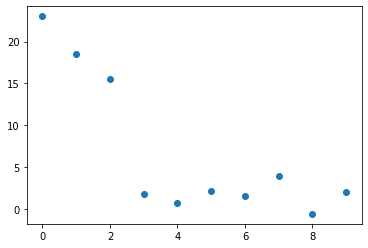

In [9]:
avg_pm = 0
pm = []

for i in range( 0, len(lastknicksgame.PLUS_MINUS)):
        avg_pm = (avg_pm + lastknicksgame.PLUS_MINUS[i])/(i+1)
        pm.append(avg_pm)
plt.scatter(y =pm, x= range(0, len(pm)))
plt.show()

In [10]:
lastknicksgame = games.sort_values('GAME_DATE').iloc[-1]
lastknicksgame.head(n=10)

SEASON_ID                     22019
TEAM_ID                  1610612738
TEAM_ABBREVIATION               BOS
TEAM_NAME            Boston Celtics
GAME_ID                  0021900029
GAME_DATE                2019-10-26
MATCHUP                   BOS @ NYK
WL                                W
MIN                             242
PTS                             118
Name: 0, dtype: object

In [11]:
from nba_api.stats.endpoints import playbyplayv2
import pandas as pd

description = []

pbp = playbyplayv2.PlayByPlayV2(lastknicksgame.GAME_ID)
pbp = pbp.get_data_frames()[0]

for i in range(0, len(pbp.GAME_ID)):
    if pbp.PLAYER1_TEAM_NICKNAME[i] == 'Celtics' or pbp.PLAYER2_TEAM_NICKNAME[i] == 'Celtics' or pbp.PLAYER3_TEAM_NICKNAME[i] == 'Celtics':
        if pbp.HOMEDESCRIPTION[i] != None:
            description.append(pbp.HOMEDESCRIPTION[i])
        else:
            description.append(pbp.VISITORDESCRIPTION[i])

description

['Jump Ball Robinson vs. Williams III: Tip to Walker',
 "Hayward 2' Driving Dunk (2 PTS)",
 'Payton STEAL (1 STL)',
 "MISS Walker 15' Jump Shot",
 'Morris Sr. P.FOUL (P1.T1) (N.Sago)',
 "MISS Tatum 21' Step Back Jump Shot",
 'Randle Bad Pass Turnover (P1.T1)',
 "MISS Hayward 27' 3PT Jump Shot",
 'Williams III S.FOUL (P1.T1) (N.Sago)',
 "MISS Tatum 1' Driving Finger Roll Layup",
 'Hayward OFF.Foul (P1) (E.Lewis)',
 'Hayward Offensive Foul Turnover (P2.T2)',
 'Barrett Bad Pass Turnover (P1.T3)',
 "MISS Brown 4' Driving Floating Bank Jump Shot",
 'Williams III REBOUND (Off:1 Def:0)',
 'Robinson P.FOUL (P1.T2) (N.Sago)',
 "MISS Williams III 8' Alley Oop Layup",
 'Hayward REBOUND (Off:1 Def:0)',
 "MISS Hayward 1' Tip Layup Shot",
 "MISS Brown 27' 3PT Jump Shot",
 'SUB: Smart FOR Hayward',
 'SUB: Poirier FOR Williams III',
 "Brown 2' Alley Oop Dunk (2 PTS) (Smart 1 AST)",
 'Payton STEAL (2 STL)',
 "MISS Poirier 3' Driving Layup",
 'Walker REBOUND (Off:1 Def:0)',
 "Walker 2' Putback Layup (2 